# Houston Property Tax Data Exploration

We will work on Harris County Appraisal District (HCAD) real property dataset. This database has more than 1 million records. It consists of multiple tables covering features such as property size, market value, number of bedrooms, name of owners and etc.

Because of the size limit we will focus only on properties located in zip code 77079 and look closer at features such as values, number of bedrooms, type of properties, ownership duration etc.

HCAD data is used for actual annual property tax calculation for all real properties in Houston, Texas. And because the property tax is the main revenue source for Houston city, we can assume that it contains almost all habitable or useful real estate properties in Harris county.

The disadvantage of focusing only on one zip code is that we may not be able to transfer all conclusions to other real estate properties located in other zip codes. This is especially important asq real estate is typically a custom product subject o its specific usage, owners’ interests, original developer’s plan, environmental situations and many more.

# Analytic Questions

## Question 1: Is there a difference in building size given marital status of the owner(s)?


## Question 2. Is there a variation in square feet market price of residential properties with respect to proximity to commercial buildings?


## Question 3: Every property has two values, market and assessed (for tax purpose). The delta of these two values indicates the negotiation leverage of property owner against the tax collector. Now, is there a variation in this delta value between commercial and residential properties?

In [183]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
fig=plt.figure()
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import ttest_ind
from scipy import stats


# Read all data from source
df = pd.DataFrame()
df = pd.read_csv("C:/Users/aath/Dropbox/MAEN/Thankful/Data/Capstone/here/hcad.csv")

# Aggregate categorical variables to group by State Class type

df1 = df[['ACCOUNT','STATE_CLASS', 'LAST_INSPECTED_DATE', 'LAST_INSPECTED_DATE_DURATION', 'BUILD_AGE', 'MAP_FACET', 'YR_IMPR']]


## These are all relevant variables
ACCOUNT, MAIL_CITY, STR_NAME, MAP_FACET, YR_IMPR, TOTAL_BUILDING_AREA, TOTAL_LAND_AREA, LAND_VALUE, IMPROVEMENT_VALUE, ASSESSED_VALUE, TOTAL_APPRAISED_VALUE
TOTAL_MARKET_VALUE, DELTA_ASSESSED_MARKET_VALUE, DELTA_ASSESSED_MARKET_VALUE_RATIO, BUILD_VALUE_PER_BUILD_SQF, TOTAL_MARKET_VALUE_PER_SQF_BUILD, LAND_VALUE_PER_LAND_SQF, LAND_VALUE_PER_BUILD_SQF, NEW_OWNER_DATE, BUILD_AGE
NEW_OWNER_DURATION, LAST_INSPECTED_DATE, LAST_INSPECTED_DATE_DURATION, ABSENTEE_OWNER, SINGLE_COUPLE_OWNER, CORP_OWNER
RESIDENTIAL_COMMERCIAL


# Plot no. 1: Frequency counts of class types

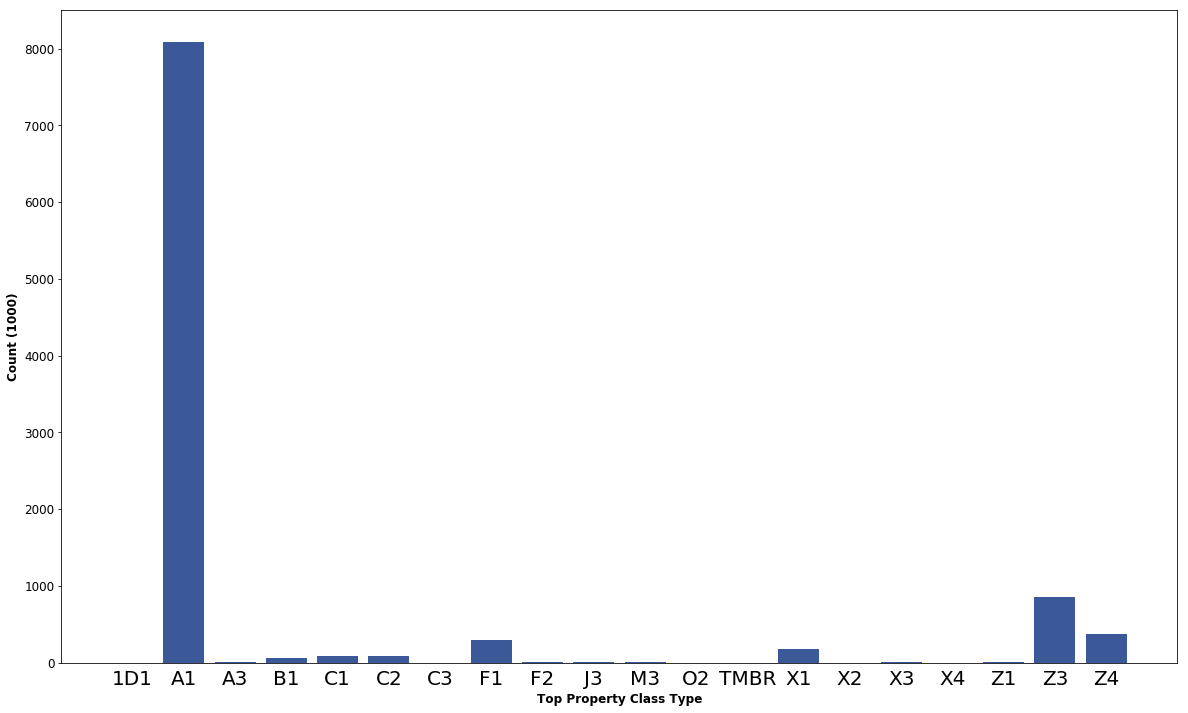

In [184]:
                                            # PLOT No. 1
grouped = df1.groupby(['STATE_CLASS'])

# Count frequency
df2 = grouped.count()

fig = plt.figure(figsize=(15, 20))


# Get column names of each counted variable
col_location = df2.columns.get_loc('ACCOUNT')
df3= df2.iloc[:,col_location]

# Get Category names for plot
labels = list(df3.index)

fig, ax1 = plt.subplots(figsize=(20,12))

rects1 = ax1.bar(range(20), df3, align='center',color='#3b5998')

# Set spines to be invisible
# for spine in ax1.spines.values():
#     spine.set_visible(False)

# Format ticks and labels
plt.xticks(range(20), labels,fontsize=20)
for tic in ax1.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
plt.yticks(fontsize=12)
plt.xlabel('Top Property Class Type',fontsize=12,
fontweight='semibold')
plt.ylabel('Count (1000)',fontsize=12,fontweight='semibold')

plt.show()
                                                


# Map facet frequency = Geographic density

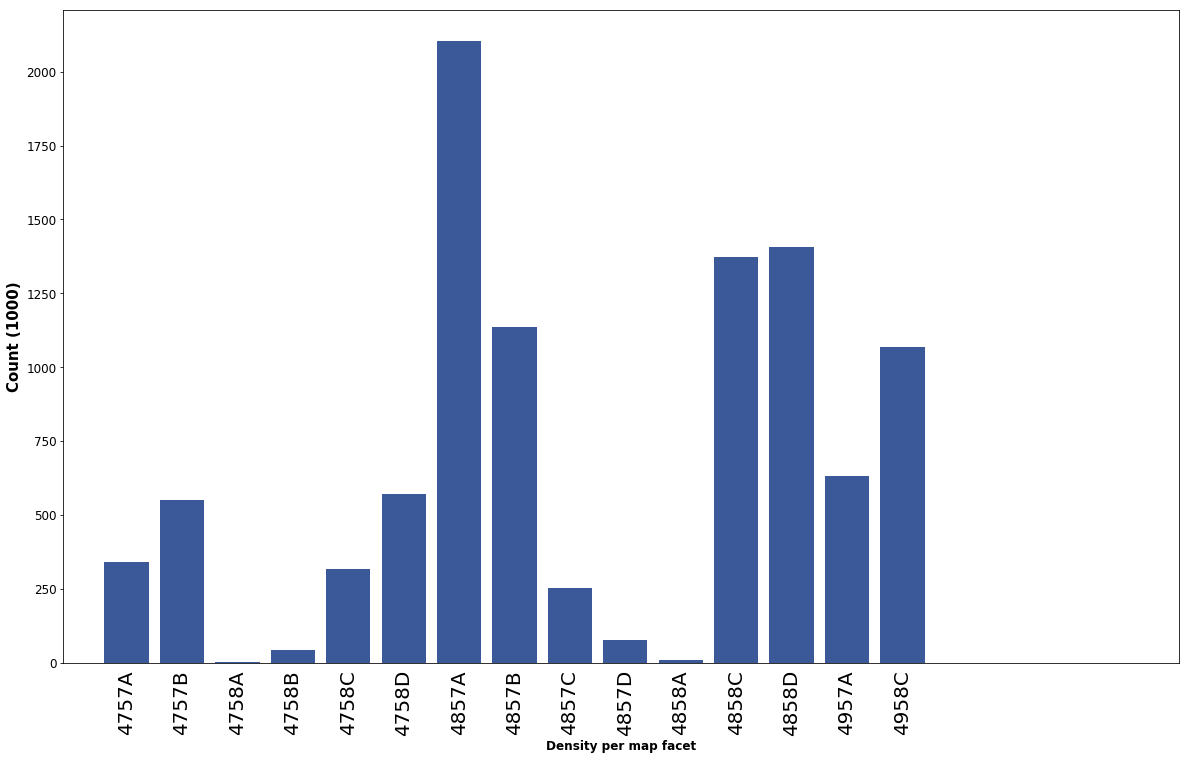

In [185]:
grouped = df1.groupby(['MAP_FACET'])

# Count frequency
df2 = grouped.count()

fig = plt.figure(figsize=(15, 20))


# Get column names of each counted variable
col_location = df2.columns.get_loc('ACCOUNT')
df3= df2.iloc[:,col_location]

# Get Category names for plot
labels = list(df3.index)

fig, ax2 = plt.subplots(figsize=(20,12))

rects1 = ax2.bar(range(15), df3, align='center',color='#3b5998')

# Set spines to be invisible
for spine in ax1.spines.values():
    spine.set_visible(False)

# Format ticks and labels
plt.xticks(range(20), labels,fontsize=20, rotation=90)
for tic in ax2.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
plt.yticks(fontsize=12)
plt.xlabel('Density per map facet',fontsize=12, 
fontweight='semibold')
plt.ylabel('Count (1000)',fontsize=15,fontweight='semibold')

plt.show()

# Class types per map facet pivot table

In [186]:
# Get a sub section of main imported df
df1 = df[['STATE_CLASS', 'MAP_FACET']]

# Clean for NAs
df2 = df1.dropna()

# Add a column of 1s to be used as dummy variable

df2['ONES'] = pd.Series([1 for x in range(len(df2.index))])

# Clean for NAs once more
df3=df2.dropna(subset=['ONES']) 

#

table = pd.pivot_table(df3,index=["STATE_CLASS"], values=["ONES"],
               columns=["MAP_FACET"],aggfunc=np.sum, fill_value=0,margins=True)

table

C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


ONES                                                          \
MAP_FACET    4757A  4757B 4758A 4758B  4758C  4758D   4857A   4857B  4857C   
STATE_CLASS                                                                  
A1           320.0  359.0   0.0   0.0  254.0  458.0  1719.0  1104.0  252.0   
A3             1.0    0.0   0.0   0.0    0.0    1.0     0.0     1.0    0.0   
B1             1.0   17.0   0.0   0.0    0.0   17.0     5.0     4.0    0.0   
C1             0.0    3.0   0.0  17.0    1.0    8.0     0.0     4.0    2.0   
C2             4.0    0.0   0.0  11.0   14.0   20.0     4.0     1.0    0.0   
F1            11.0    2.0   0.0   0.0   37.0   33.0    66.0    14.0    0.0   
F2             0.0    0.0   0.0   3.0    0.0    0.0     0.0     0.0    0.0   
J3             0.0    2.0   0.0   3.0    0.0    0.0     0.0     0.0    0.0   
O2             0.0    0.0   0.0   0.0    0.0    0.0     0.0     2.0    0.0   
TMBR           0.0    0.0   0.0   0.0    0.0    1.0     0.0     0.0    0.0   
X1             1.0    4.0   1.0   7.0    4.0    8.0     1.0     4.0    0.0   
X2             0.0    0.0   0.0   0.0    0.0    0.0     0.0     0.0    0.0   
X3             0.0    1.0   0.0   0.0    0.0    1.0     1.0     2.0    0.0   
X4             0.0    0.0   0.0   1.0    0.0    0.0     0.0     0.0    0.0   
Z1             0.0    0.0   0.0   0.0    0.0    0.0     4.0     0.0    0.0   
Z3             0.0  145.0   0.0   0.0    0.0    0.0    94.0     0.0    0.0   
Z4             0.0    0.0   0.0   0.0    0.0    0.0   198.0     0.0    0.0   
All          338.0  533.0   1.0  42.0  310.0  547.0  2092.0  1136.0  254.0   

                                                                
MAP_FACET   4857D 4858A   4858C   4858D  4957A   4958C     All  
STATE_CLASS                                                     
A1           75.0   0.0   967.0  1348.0  600.0   556.0  8012.0  
A3            0.0   0.0     1.0     0.0    1.0     2.0     7.0  
B1            0.0   0.0     4.0     2.0    0.0     0.0    50.0  
C1            0.0   0.0     4.0    15.0   12.0     7.0    73.0  
C2            0.0   1.0     5.0     5.0    1.0     1.0    67.0  
F1            1.0   4.0    42.0    26.0   11.0    10.0   257.0  
F2            0.0   3.0     0.0     0.0    0.0     0.0     6.0  
J3            0.0   0.0     0.0     0.0    0.0     1.0     6.0  
O2            0.0   0.0     0.0     0.0    0.0     0.0     2.0  
TMBR          0.0   0.0     0.0     0.0    0.0     0.0     1.0  
X1            0.0   2.0     7.0     2.0    1.0     2.0    44.0  
X2            0.0   0.0     0.0     0.0    2.0     0.0     2.0  
X3            0.0   0.0     3.0     0.0    1.0     0.0     9.0  
X4            0.0   0.0     1.0     0.0    0.0     0.0     2.0  
Z1            0.0   0.0     0.0     0.0    0.0     0.0     4.0  
Z3            0.0   0.0   327.0     0.0    0.0   285.0   851.0  
Z4            0.0   0.0     0.0     0.0    0.0   180.0   378.0  
All          76.0  10.0  1361.0  1398.0  629.0  1044.0  9771.0

In [187]:
g = table.query('STATE_CLASS == ["A1", "F1", "Z3", "Z4"]')

In [188]:
#g.append(g.sum(numeric_only=True), ignore_index=True)
total = g.apply(np.sum)

# Building's age

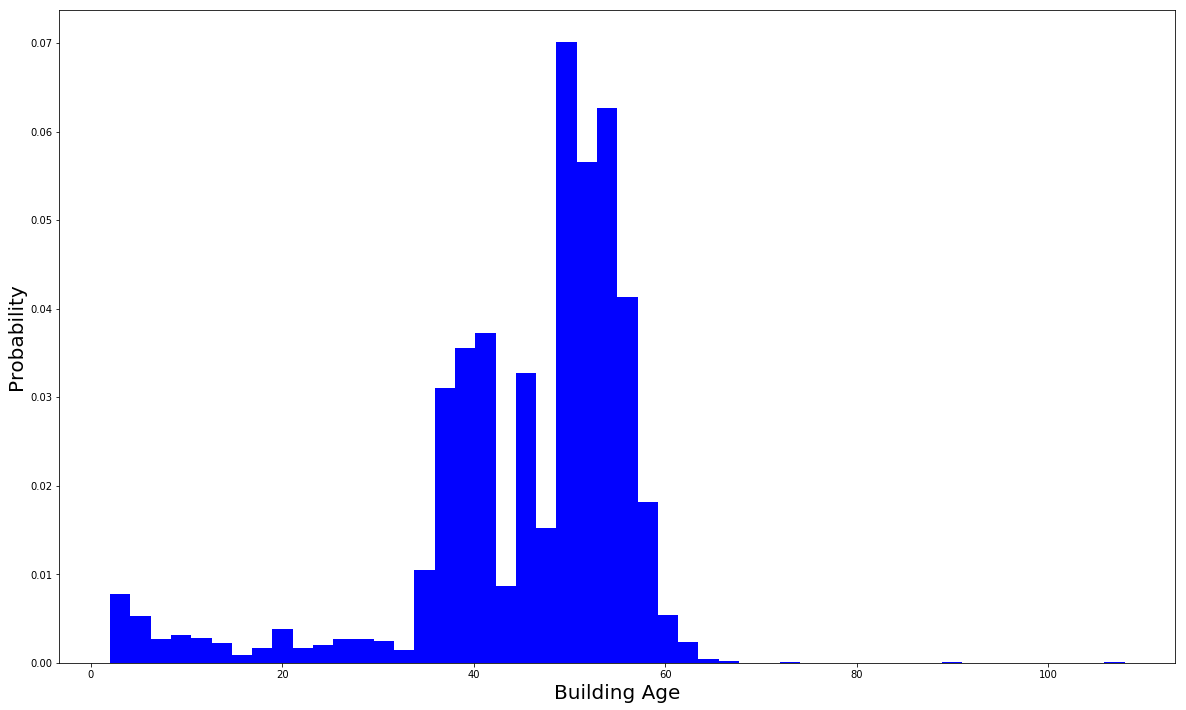

In [189]:
df1 = df[['ACCOUNT', 'BUILD_AGE', 'MAP_FACET', 'YR_IMPR', 'BUILD_VALUE_PER_BUILD_SQF',
          'TOTAL_MARKET_VALUE_PER_SQF_BUILD', 'LAND_VALUE_PER_LAND_SQF', 'LAND_VALUE_PER_BUILD_SQF']]
# Clean for NAs
df2 = df1.dropna()

col_location = df2.columns.get_loc('BUILD_AGE')
df3= df2.iloc[:,col_location]

fig, ax2 = plt.subplots(figsize=(20,12))

num_bins = 50

# the histogram of the data
n, bins, patches = plt.hist(df3, num_bins, normed=1, facecolor='blue', alpha=3)
 
plt.xlabel('Building Age', fontsize=20)
plt.ylabel('Probability', fontsize=20)
 

plt.show()

# Building's age vs market value usd/sqf

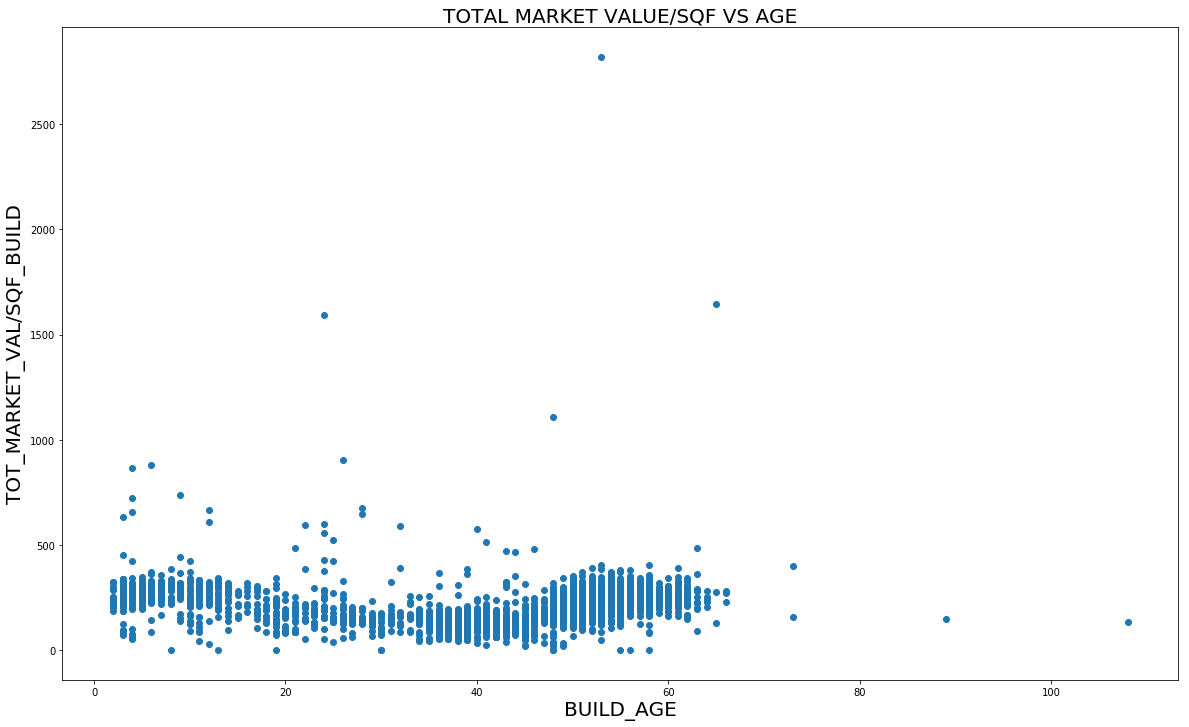

In [190]:
df1 = df[['ACCOUNT', 'BUILD_AGE', 'MAP_FACET', 'YR_IMPR', 'BUILD_VALUE_PER_BUILD_SQF',
          'TOTAL_MARKET_VALUE_PER_SQF_BUILD', 'LAND_VALUE_PER_LAND_SQF', 'LAND_VALUE_PER_BUILD_SQF']]
# Clean for NAs
df2 = df1.dropna()

# Prepare data
col_location = df2.columns.get_loc('BUILD_AGE')
df3= df2.iloc[:,col_location]

col_location = df2.columns.get_loc('TOTAL_MARKET_VALUE_PER_SQF_BUILD')
df4= df2.iloc[:,col_location]

# # Creat plot
fig, ax3 = plt.subplots(figsize=(20,12))

# #fig, ax2 = plt.subplots(figsize=(20,12))

ax3.scatter(df3, df4)
plt.title('TOTAL MARKET VALUE/SQF VS AGE', fontsize=20)
plt.xlabel('BUILD_AGE', fontsize=20)
plt.ylabel('TOT_MARKET_VAL/SQF_BUILD', fontsize=20)
plt.show()

# Building's age vs land value usd/sqf

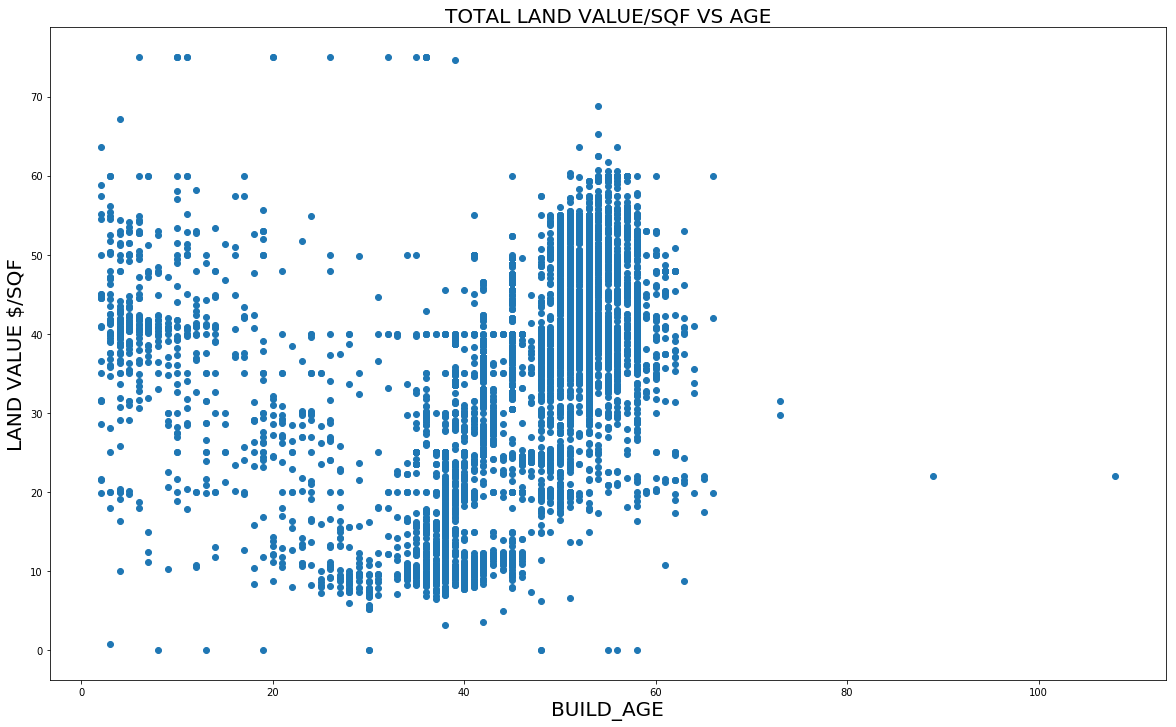

In [191]:
df1 = df[['ACCOUNT', 'BUILD_AGE', 'MAP_FACET', 'YR_IMPR', 'BUILD_VALUE_PER_BUILD_SQF',
          'TOTAL_MARKET_VALUE_PER_SQF_BUILD', 'LAND_VALUE_PER_LAND_SQF', 'LAND_VALUE_PER_BUILD_SQF']]
# Clean for NAs
df2 = df1.dropna()

# Prepare data
col_location = df2.columns.get_loc('BUILD_AGE')
df3= df2.iloc[:,col_location]

col_location = df2.columns.get_loc('LAND_VALUE_PER_LAND_SQF')
df4= df2.iloc[:,col_location]

# # Creat plot
fig, ax3 = plt.subplots(figsize=(20,12))

# #fig, ax2 = plt.subplots(figsize=(20,12))

ax3.scatter(df3, df4)
plt.title('TOTAL LAND VALUE/SQF VS AGE', fontsize=20)
plt.xlabel('BUILD_AGE', fontsize=20)
plt.ylabel('LAND VALUE $/SQF', fontsize=20)
plt.show()

# Building value usd/sqf vs land value usd/sqf

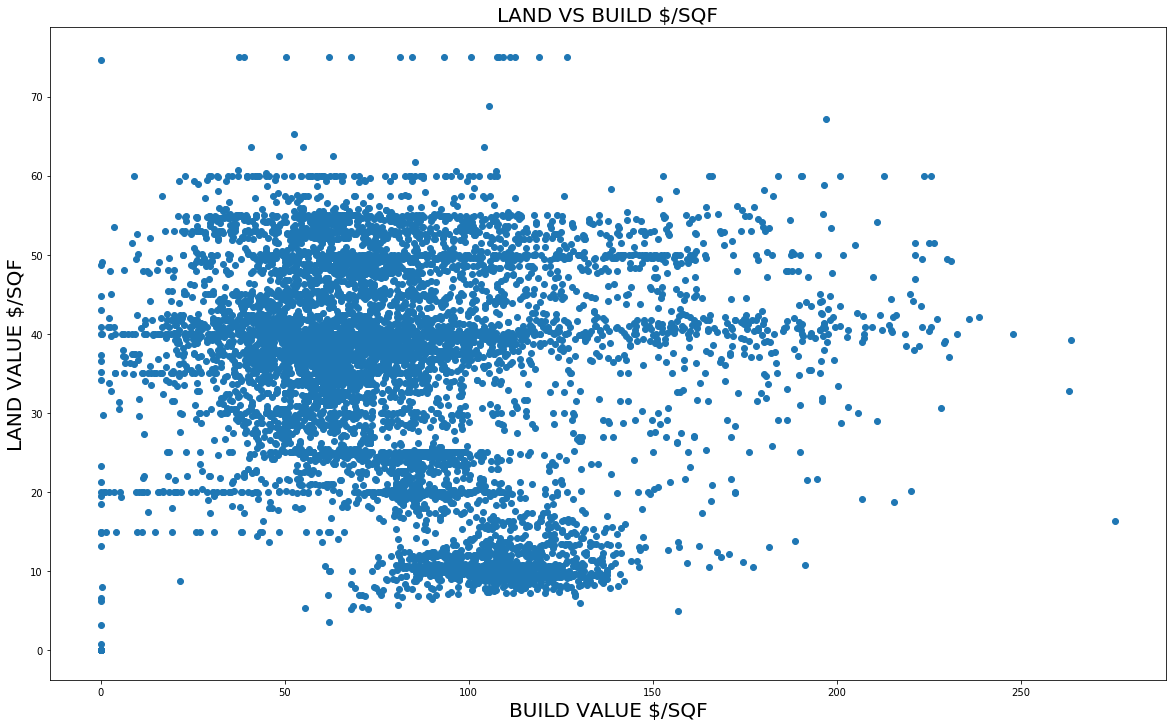

In [192]:
df1 = df[['ACCOUNT', 'BUILD_AGE', 'MAP_FACET', 'YR_IMPR', 'BUILD_VALUE_PER_BUILD_SQF',
          'TOTAL_MARKET_VALUE_PER_SQF_BUILD', 'LAND_VALUE_PER_LAND_SQF', 'LAND_VALUE_PER_BUILD_SQF']]
# Clean for NAs
df2 = df1.dropna()

# Prepare data
col_location = df2.columns.get_loc('BUILD_VALUE_PER_BUILD_SQF')
df3= df2.iloc[:,col_location]

col_location = df2.columns.get_loc('LAND_VALUE_PER_LAND_SQF')
df4= df2.iloc[:,col_location]

# # Creat plot
fig, ax3 = plt.subplots(figsize=(20,12))

# #fig, ax2 = plt.subplots(figsize=(20,12))

ax3.scatter(df3, df4)
plt.title('LAND VS BUILD $/SQF', fontsize=20)
plt.xlabel('BUILD VALUE $/SQF', fontsize=20)
plt.ylabel('LAND VALUE $/SQF', fontsize=20)
plt.show()

# Market and appraised values

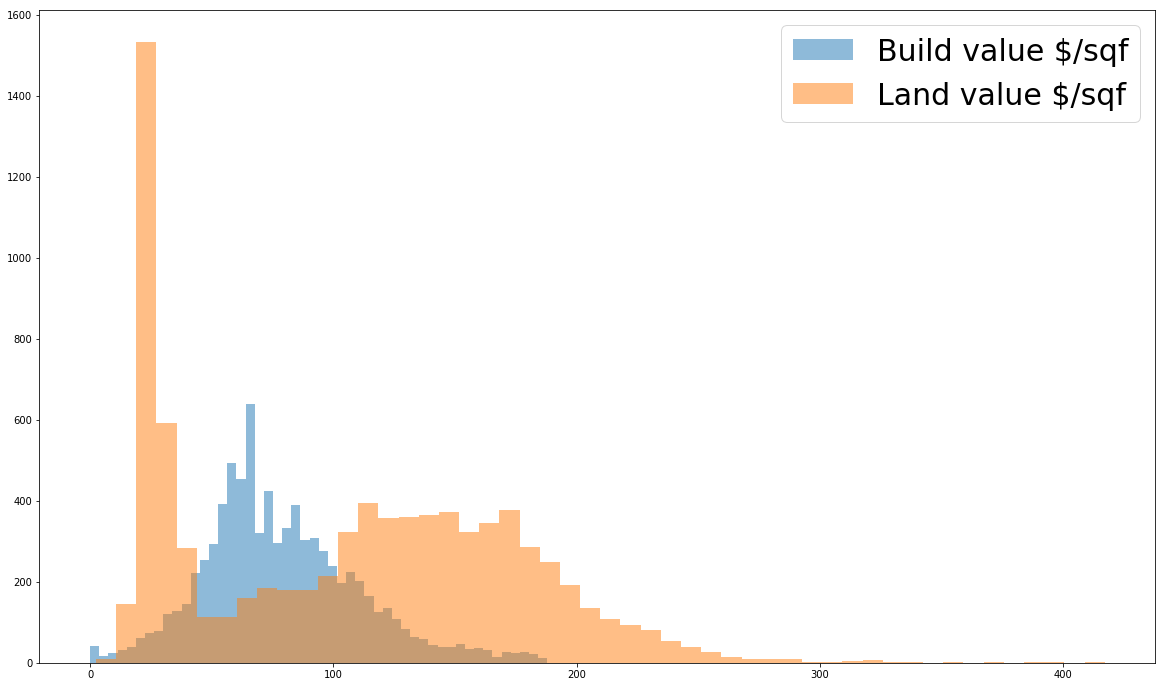

In [193]:
import numpy 
df1 = df[['ACCOUNT', 'BUILD_AGE', 'MAP_FACET', 'YR_IMPR', 'BUILD_VALUE_PER_BUILD_SQF',
          'TOTAL_MARKET_VALUE_PER_SQF_BUILD', 'LAND_VALUE_PER_LAND_SQF', 'LAND_VALUE_PER_BUILD_SQF',
          'TOTAL_APPRAISED_VALUE', 'TOTAL_MARKET_VALUE']]

# Clean for NAs
df2 = df1.dropna()

# Prepare data
# Pull out x values
col_location = df2.columns.get_loc('BUILD_VALUE_PER_BUILD_SQF')
df3= df2.iloc[:,col_location]

# Remove outliers
df4 = df3[~((df3-df3.mean()).abs()>3*df3.std())]
     

# Remove outliers
# Pull out y values
col_location = df2.columns.get_loc('LAND_VALUE_PER_BUILD_SQF')
df5= df2.iloc[:,col_location]

# Remove outliers
df6 = df5[~((df5-df5.mean()).abs()>4*df5.std())]

# Creat plot

fig, ax3 = plt.subplots(figsize=(20,12))

pyplot.hist(df4, bins=50, alpha=0.5, label='Build value $/sqf')
pyplot.hist(df6, bins=50, alpha=0.5, label='Land value $/sqf')
pyplot.legend(loc='upper right', fontsize=30)
plt.show()

# Top 11 Map Facet

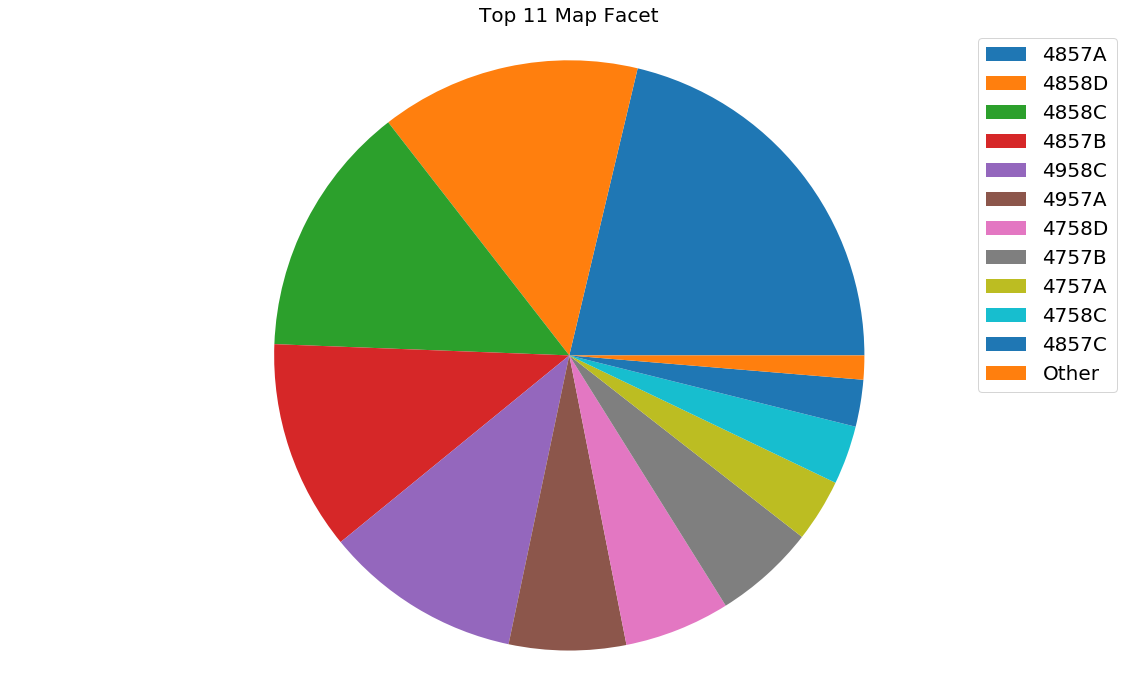

In [194]:
# Prepare data
df1 = df[['MAP_FACET']]
df2 = pd.DataFrame(df1.MAP_FACET.value_counts())

# Count top 11 categories
other = int(df2[11:].sum())
df2 = df2[:11]

df2.loc[12] = other
df2 = df2.rename(index={12: 'Other'})

plt.figure(figsize=(20, 12))
plt.pie(df2.MAP_FACET)
plt.axis('equal', fontsize=20)
plt.title('Top 11 Map Facet', fontsize=20)
plt.legend(df2.index, fontsize=20)

# Top 12 Cities of Owners

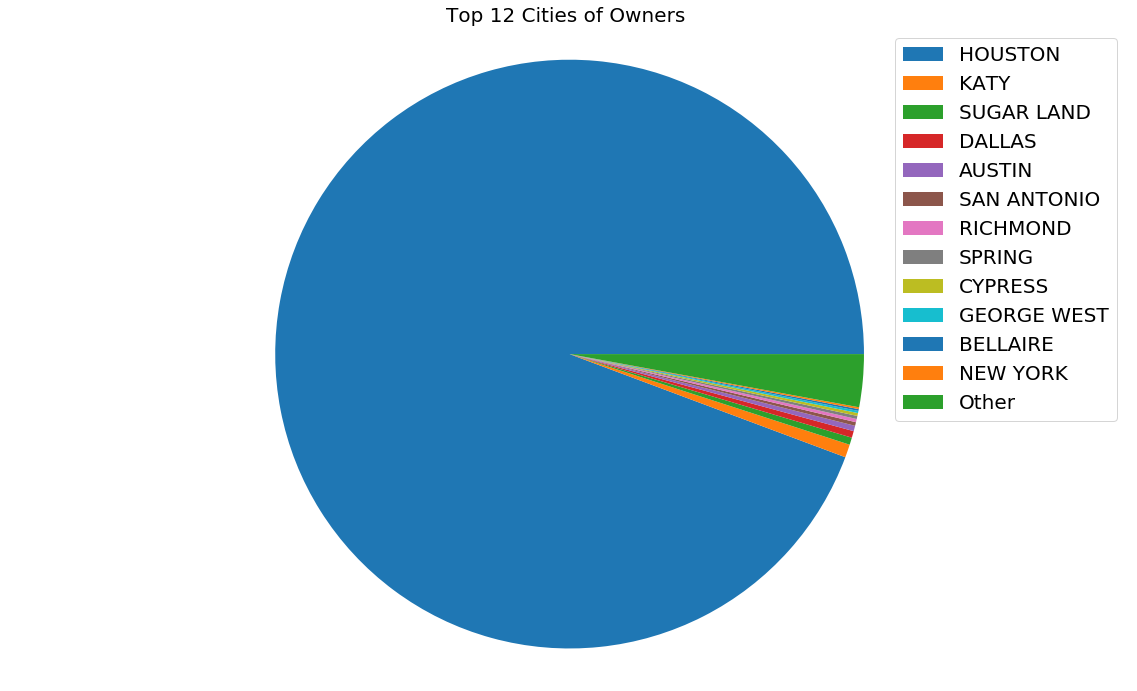

In [195]:
# Prepare data
df1 = df[['MAIL_CITY']]
df2 = pd.DataFrame(df1.MAIL_CITY.value_counts())

#Count top 12 categories
other = int(df2[12:].sum())
df2 = df2[:12]

df2.loc[13] = other
df2 = df2.rename(index={13: 'Other'})

plt.figure(figsize=(20, 12))
plt.pie(df2.MAIL_CITY)
plt.axis('equal', fontsize=20)
plt.title('Top 12 Cities of Owners ', fontsize=20)
plt.legend(df2.index, fontsize=20)

# Type of ownership 

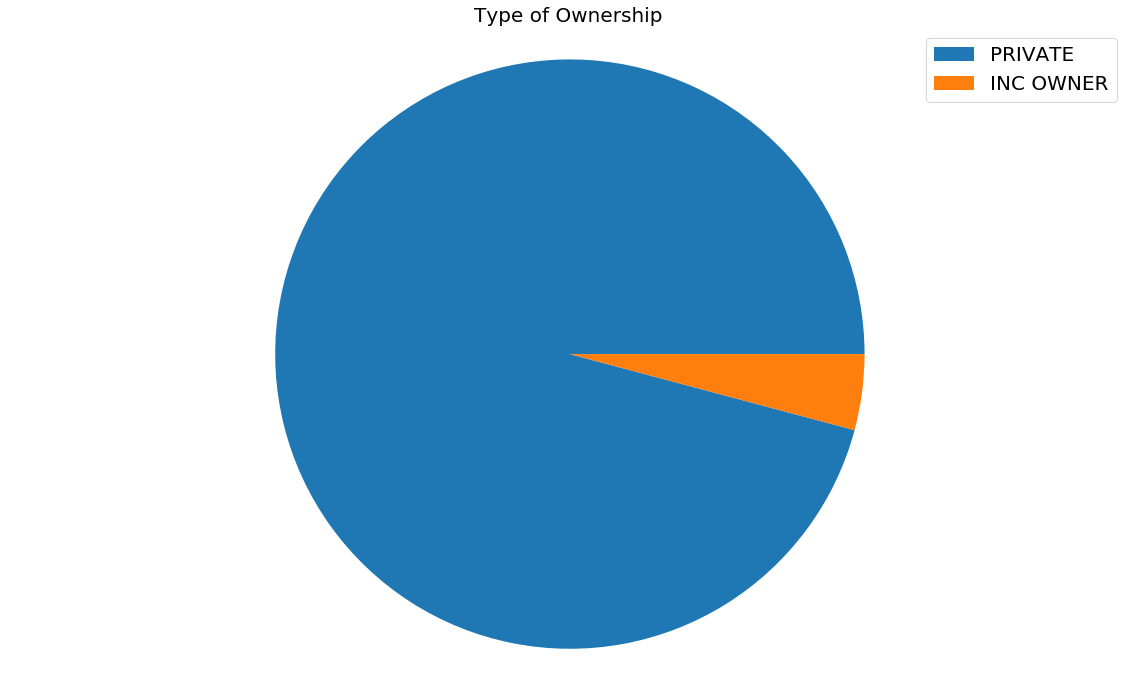

In [196]:
# Prepare data
df1 = df[['CORP_OWNER']]
df2 = pd.DataFrame(df1.CORP_OWNER.value_counts())

plt.figure(figsize=(20, 12))
plt.pie(df2.CORP_OWNER)
plt.axis('equal', fontsize=20)
plt.title('Type of Ownership', fontsize=20)
plt.legend(df2.index, fontsize=20)

# Marital status of owners

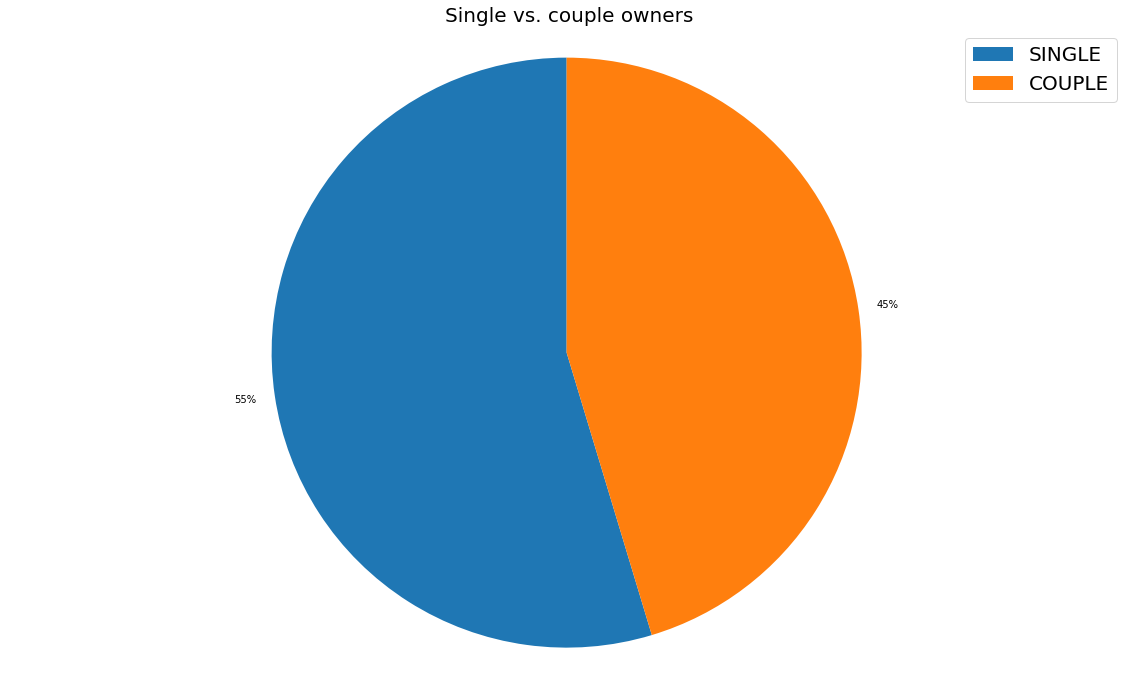

In [197]:
df1 = df[['ACCOUNT', 'BUILD_AGE', 'MAP_FACET', 'STATE_CLASS', 'YR_IMPR', 'BUILD_VALUE_PER_BUILD_SQF',
          'TOTAL_MARKET_VALUE_PER_SQF_BUILD', 'LAND_VALUE_PER_LAND_SQF', 'LAND_VALUE_PER_BUILD_SQF',
          'TOTAL_APPRAISED_VALUE', 'TOTAL_MARKET_VALUE', 'SINGLE_COUPLE_OWNER']]

# Clean for NAs
df2 = df1.dropna()

# Pull out x values
col_loc1 = df2.columns.get_loc('STATE_CLASS')
col_loc2 = df2.columns.get_loc('SINGLE_COUPLE_OWNER')

df3= df2.iloc[:,col_loc1] 
df4= df2.iloc[:,col_loc2] 

df5 = pd.DataFrame({'STATE_CLASS': df3, 'SINGLE_COUPLE_OWNER': df4})

# Remove commercial building. Residential building have the class type A1
df6 = df5.drop(df5[df5.STATE_CLASS != 'A1'].index)

# Prepare a count table by indexing at martical status of owners

df7 = pd.DataFrame(df6.SINGLE_COUPLE_OWNER.value_counts())

plt.figure(figsize=(20, 12))
plt.pie(df7.SINGLE_COUPLE_OWNER, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,
        shadow=False, startangle=90)
plt.axis('equal', fontsize=20)
plt.title('Single vs. couple owners', fontsize=20)
plt.legend(df7.index, fontsize=20)

# Question 1: Is there a difference in building size given marital status of the owner(s)?

## Purpose: Test whether the means of two groups differs from each other on a continuous dependent variable (e.g. building size). Also to determine if there is a significant difference between the two groups

### H0: The means of singles and married groups are the same
### H1: The means of singles and married groups are different from each other
#### Independent variable: Maritical status of owners
#### Dependent variable: Building sqf size


C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


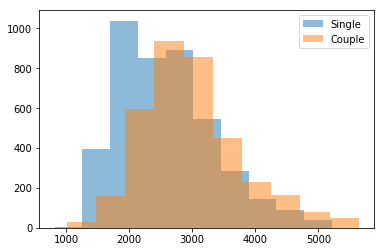

In [198]:
df1 = df[['BUILD_AGE', 'MAP_FACET', 'STATE_CLASS', 'YR_IMPR', 'TOTAL_BUILDING_AREA', 
          'TOTAL_LAND_AREA', 'LAND_VALUE', 'IMPROVEMENT_VALUE', 'ASSESSED_VALUE', 'TOTAL_APPRAISED_VALUE',
          'TOTAL_MARKET_VALUE', 'DELTA_ASSESSED_MARKET_VALUE','BUILD_VALUE_PER_BUILD_SQF',
          'TOTAL_MARKET_VALUE_PER_SQF_BUILD', 'LAND_VALUE_PER_LAND_SQF', 'LAND_VALUE_PER_BUILD_SQF',
          'TOTAL_APPRAISED_VALUE', 'TOTAL_MARKET_VALUE', 'SINGLE_COUPLE_OWNER']]

# Clean for NAs
df2 = df1.dropna()

# Drop all columns not in use
cols = [col for col in df2.columns if col in ['STATE_CLASS','TOTAL_BUILDING_AREA','SINGLE_COUPLE_OWNER']]
df3 = df2[cols]

# Dron all non residential properties. Those without A1 State Class
df4 = df3.drop(df3[df3.STATE_CLASS != 'A1'].index)

# Split the table into two 
df5 = df4[df4.SINGLE_COUPLE_OWNER != 'COUPLE']
df6 = df4[df.SINGLE_COUPLE_OWNER == 'COUPLE']

# Remove helping columns and make df ready for plot

df7 = df5['TOTAL_BUILDING_AREA']
df8 = df6['TOTAL_BUILDING_AREA']

# Remove outliers
single = df7[~((df7-df7.mean()).abs()>3*df7.std())]
couple = df8[~((df8-df8.mean()).abs()>3*df8.std())]


plt.hist(single, alpha=0.5, label='Single') 
plt.hist(couple, alpha=0.5, label='Couple') 
plt.legend(loc='upper right') 
plt.show()


### Calcualte each group mean and mean difference between them

In [199]:
# Calcualte mean and std
print("Single mean = {},".format(single.mean()), "Single std = {},".format(single.std()))
print("Couple mean = {},".format(couple.mean()), "Couple std = {},".format(couple.std()))


# Compute the difference between the two sample means.
mean_diff=single.mean( ) -couple.mean()
print("mean diff = {},".format(mean_diff))

Single mean = 2583.6788048552753, Single std = 765.194839675037,
Couple mean = 2997.976096737908, Couple std = 786.7944123139441,
mean diff = -414.29729188263263,


### Calcualte standard error of the sampling distribution of the difference of the means

In [200]:
size = np.array([len(single), len(couple)])
sd = np.array([single.std(), couple.std()])

# The squared standard deviations = variation in sample data
se_diff = (sum(sd ** 2 / size)) ** 0.5  

# T-test
manual_tt = mean_diff/se_diff
scipy_tt= ttest_ind(single, couple, equal_var=False)
print("manual t value = {},".format(manual_tt))
print("scipy t value = {},".format(scipy_tt))


manual t value = -23.501657013714716,
scipy t value = Ttest_indResult(statistic=-23.501657013714766, pvalue=6.6509892740720347e-118),


## Conclusion: 
## Because the pvalue is very low we can reject the null hypothesis and conclude that there is a statistically significance difference between these two means. In other words the probability of experiencing such a big t value is almost zero.

# Question 2. Is there a variation in square feet market price of residential properties with respect to proximity to commercial buildings?

## Purpose: Test whether the means of two groups differ from each other on a continuous dependent variable (e.g. usd/sqf). Also to determine if there is a significant difference between the two groups

### H0: The means of singles and married groups are the same
### H1: The means of singles and married groups are different from each other
### Independent variable: Residential and commercial properties 
### Dependent variable: market value usd/sqf


C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

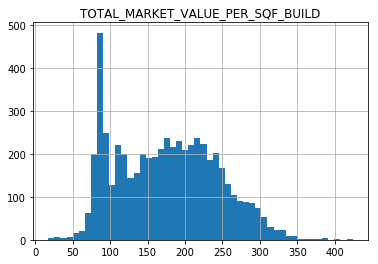

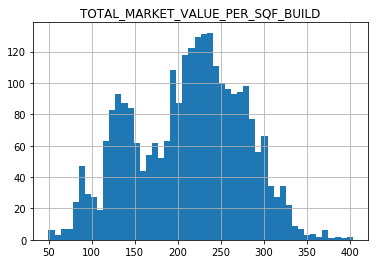

In [201]:
df1 = df[['ACCOUNT','BUILD_AGE', 'MAP_FACET', 'STATE_CLASS', 'YR_IMPR', 'TOTAL_BUILDING_AREA', 
          'TOTAL_LAND_AREA', 'LAND_VALUE', 'IMPROVEMENT_VALUE', 'ASSESSED_VALUE', 'TOTAL_APPRAISED_VALUE',
          'TOTAL_MARKET_VALUE', 'DELTA_ASSESSED_MARKET_VALUE','BUILD_VALUE_PER_BUILD_SQF',
          'TOTAL_MARKET_VALUE_PER_SQF_BUILD', 'LAND_VALUE_PER_LAND_SQF', 'LAND_VALUE_PER_BUILD_SQF',
          'TOTAL_APPRAISED_VALUE', 'TOTAL_MARKET_VALUE', 'SINGLE_COUPLE_OWNER']]

# Clean for NAs
df2 = df1.dropna()

#Drop all columns not in use
cols = [col for col in df2.columns if col in ['STATE_CLASS',
                                              'MAP_FACET',
                                              'TOTAL_MARKET_VALUE_PER_SQF_BUILD']]
df2a = df2[cols]

# Add a unique index adn use it as rank
df2a['UNIC_INDEX'] = range(1, len(df2a) + 1)
df3 = df2a.reset_index()


# Add a new columns to specify if residental or commercial
df2a["RES_COM"] = ""

def classify_build (row):
    if row['MAP_FACET'] == '4757A' :
       return 'RESIDENTIAL'
    if row['MAP_FACET'] == '4757B' :
       return 'RESIDENTIAL'
    if row['MAP_FACET'] == '4757C' :
       return 'RESIDENTIAL'
    if row['MAP_FACET'] == '4757D' :
       return 'RESIDENTIAL'
    if row['MAP_FACET'] == '4858D' :
       return 'RESIDENTIAL'
    if row['MAP_FACET'] == '4957A' :
       return 'RESIDENTIAL'
    return 'COMMERCIAL'

df2a["RES_COM"]=df2a.apply(classify_build, axis=1)

# Increasse the numbers of rows displayed for visual inspection
# pd.set_option('display.height', 1000)

# Split the table into two 
df5 = df2a[df2a.RES_COM == 'RESIDENTIAL']
df6 = df2a[df2a.RES_COM == 'COMMERCIAL']

# Remove helping columns and make df ready for plot
col_list = ['TOTAL_MARKET_VALUE_PER_SQF_BUILD']

df7 = df5[col_list]
df8 = df6[col_list]

# Help function check data type and NAN values
# df2a['TOTAL_MARKET_VALUE_PER_SQF_BUILD'].dtype.kind
# residential.isnull().values.any()

# Remove outliers

df9 = df7[~((df7-df7.mean()).abs()>3*df7.std())]
df10 = df8[~((df8-df8.mean()).abs()>3*df8.std())]

commercial = df9.dropna()
residential= df10.dropna()

fig=plt.figure(figsize=(30,20))

residential.hist(column='TOTAL_MARKET_VALUE_PER_SQF_BUILD', bins=50)
commercial.hist(column='TOTAL_MARKET_VALUE_PER_SQF_BUILD', bins=50)

plt.legend(loc='upper right') 
plt.show()


### Calcualte each group mean and mean difference between them

In [202]:
# Calcualte mean and std
print("Residential mean = {},".format(residential.mean()))
print("Residential std = {},".format(residential.std()))
print("Commercial mean = {},".format(commercial.mean()))
print("commercial std = {},".format(commercial.std()))


# Compute the difference between the two sample means.
mean_diff=residential.mean( ) - commercial.mean()
print("mean diff = {},".format(mean_diff))

# Calcualte standard error of the sampling distribution of the difference of the means

size = np.array([len(residential), len(commercial)])
sd = np.array([residential.std(), commercial.std()])

# sd is shown as 2D array and I do not know why. Need to convert it to 1D
sd2 = sd.flatten()

# The squared standard deviations = variation in sample data
se_diff = (sum(sd2 ** 2 / size)) ** 0.5  


# T-test
#manual_tt = mean_diff/se_diff
scipy_tt= ttest_ind(residential, commercial, equal_var=False)
print("manual tt value = {},".format(manual_tt))
print("scipy tt value = {},".format(scipy_tt))



Residential mean = TOTAL_MARKET_VALUE_PER_SQF_BUILD    174.940448
dtype: float64,
Residential std = TOTAL_MARKET_VALUE_PER_SQF_BUILD    67.463133
dtype: float64,
Commercial mean = TOTAL_MARKET_VALUE_PER_SQF_BUILD    212.091814
dtype: float64,
commercial std = TOTAL_MARKET_VALUE_PER_SQF_BUILD    63.955457
dtype: float64,
mean diff = TOTAL_MARKET_VALUE_PER_SQF_BUILD   -37.151366
dtype: float64,
manual tt value = -23.501657013714716,
scipy tt value = Ttest_indResult(statistic=array([-24.28829347]), pvalue=array([  5.92980807e-124])),


## Conclusion: The pvalue is very low so we can reject the null hypothesis and conclude that there is a statistically significance difference. In other words the probability of experiencing such a big t value is almost zero. This support the idea that promiximity to commercial properties impact the tax value of residential properties.

## We also need to check to see if the assumptions for using ttest are still valid. From plots we can see that these variables are lognormal and not normal. But becasue of dataset size this should be be a big concern. However, the other assumption of variance being homogenious need to be tested. This is also visible by big difference between two standard deviations.

# Question 3: Every property has two values, market and assessed (for tax purpose). The delta of these two values indicates the negotiation leverage of property owner againt the tax collector. Now, is there a variation in this delta value between commercial and residential properties?

## H0: The means of residential and commercial delta value per sqf are the same
## H1: The means of residential and commercial delta value per sqf are different
## Independent variable: Residential and commercial properties
## Dependent variable: Delta assessed and market value usd/sqf

C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

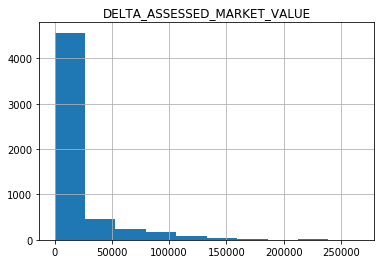

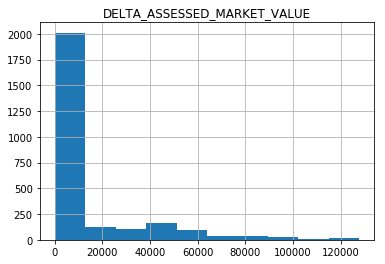

In [203]:
df1 = df[['ACCOUNT','BUILD_AGE', 'MAP_FACET', 'STATE_CLASS', 'YR_IMPR', 'TOTAL_BUILDING_AREA', 
          'TOTAL_LAND_AREA', 'LAND_VALUE', 'IMPROVEMENT_VALUE', 'ASSESSED_VALUE', 'TOTAL_APPRAISED_VALUE',
          'TOTAL_MARKET_VALUE', 'DELTA_ASSESSED_MARKET_VALUE','BUILD_VALUE_PER_BUILD_SQF',
          'TOTAL_MARKET_VALUE_PER_SQF_BUILD', 'LAND_VALUE_PER_LAND_SQF', 'LAND_VALUE_PER_BUILD_SQF',
          'TOTAL_APPRAISED_VALUE', 'TOTAL_MARKET_VALUE', 'SINGLE_COUPLE_OWNER']]

# Clean for NAs

df2 = df1.dropna()

#Drop all columns not in use
cols = [col for col in df2.columns if col in ['STATE_CLASS',
                                              'MAP_FACET',
                                              'DELTA_ASSESSED_MARKET_VALUE']]
df2a = df2[cols]

# Add a unique index adn use it as rank
df2a['UNIC_INDEX'] = range(1, len(df2a) + 1)
df3 = df2a.reset_index()


# Add a new columns to specify if residental or commercial
df2a["RES_COM"] = ""

def classify_build (row):
    if row['MAP_FACET'] == '4757A' :
       return 'RESIDENTIAL'
    if row['MAP_FACET'] == '4757B' :
       return 'RESIDENTIAL'
    if row['MAP_FACET'] == '4757C' :
       return 'RESIDENTIAL'
    if row['MAP_FACET'] == '4757D' :
       return 'RESIDENTIAL'
    if row['MAP_FACET'] == '4858D' :
       return 'RESIDENTIAL'
    if row['MAP_FACET'] == '4957A' :
       return 'RESIDENTIAL'
    return 'COMMERCIAL'

df2a["RES_COM"]=df2a.apply(classify_build, axis=1)

# Increasse the numbers of rows displayed
#pd.set_option('display.height', 1000)

# Split the table into two 
df5 = df2a[df2a.RES_COM == 'RESIDENTIAL']
df6 = df2a[df2a.RES_COM == 'COMMERCIAL']

# Remove helping columns and make df ready for plot
col_list = ['DELTA_ASSESSED_MARKET_VALUE']

df7 = df5[col_list]
df8 = df6[col_list]

# Help function check data type and NAN values
# df2a['TOTAL_MARKET_VALUE_PER_SQF_BUILD'].dtype.kind
# residential.isnull().values.any()

# Remove outliers

df9 = df7[~((df7-df7.mean()).abs()>3*df7.std())]
df10 = df8[~((df8-df8.mean()).abs()>3*df8.std())]

commercial = df9.dropna()
residential= df10.dropna()

fig=plt.figure(figsize=(30,20))
#plt.figure(figsize=(20, 12))

residential.hist(column='DELTA_ASSESSED_MARKET_VALUE', bins=10)
commercial.hist(column='DELTA_ASSESSED_MARKET_VALUE', bins=10)

#plt.hist(residential, alpha=0.5,  label='RESIDENTIAL') 
#plt.hist(commercial, alpha=0.5, label='COMMERCIAL') 
plt.legend(loc='upper right') 
plt.show()


In [204]:
### Calcualte each group mean and mean difference between them

# Calcualte mean and std
print("Residential mean = {},".format(residential.mean()))
print("Residential std = {},".format(residential.std()))
print("Commercial mean = {},".format(commercial.mean()))
print("commercial std = {},".format(commercial.std()))


# Compute the difference between the two sample means.
mean_diff=residential.mean( ) - commercial.mean()
print("mean diff = {},".format(mean_diff))

### Calcualte standard error of the sampling distribution of the difference of the means

size = np.array([len(residential), len(commercial)])
sd = np.array(residential.std(), commercial.std())

# The squared standard deviations = variation in sample data
se_diff = (sum(sd ** 2 / size)) ** 0.5  

# T-test
manual_tt = mean_diff/se_diff
scipy_tt= ttest_ind(residential, commercial, equal_var=False)
print("manual t value = {},".format(manual_tt))
print("scipy t value = {},".format(scipy_tt))


Residential mean = DELTA_ASSESSED_MARKET_VALUE    15575.575166
dtype: float64,
Residential std = DELTA_ASSESSED_MARKET_VALUE    30607.753315
dtype: float64,
Commercial mean = DELTA_ASSESSED_MARKET_VALUE    11997.246679
dtype: float64,
commercial std = DELTA_ASSESSED_MARKET_VALUE    23939.891054
dtype: float64,
mean diff = DELTA_ASSESSED_MARKET_VALUE    3578.328486
dtype: float64,
manual t value = DELTA_ASSESSED_MARKET_VALUE    4.946122
dtype: float64,
scipy t value = Ttest_indResult(statistic=array([ 5.76427687]), pvalue=array([  8.57967302e-09])),


## Conclusion: Such a low p value indicates that mean_diff of 3578 is significant and cannot be associated with randomness in data. This again implies we reject H0 and accept the alternative hypothesis. In other words, we need to conclude that there is a relationsip between commercial and residential properties and how they are assessed for tax purposes. However, the test of variance being homogeneous needed to be studied.
